In [57]:
import numpy as np
import pandas as pd

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df = pd.read_csv("D:/Python For DA/911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [60]:
df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [61]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [62]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [63]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [64]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [66]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


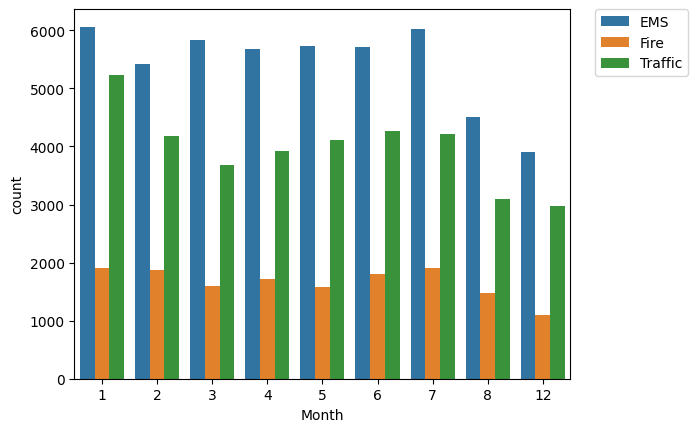

In [68]:
#countplot of the day of week with the hue based off the reason column
sns.countplot(x = 'Month', data = df, hue= 'Reason')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad = 0)

In [70]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


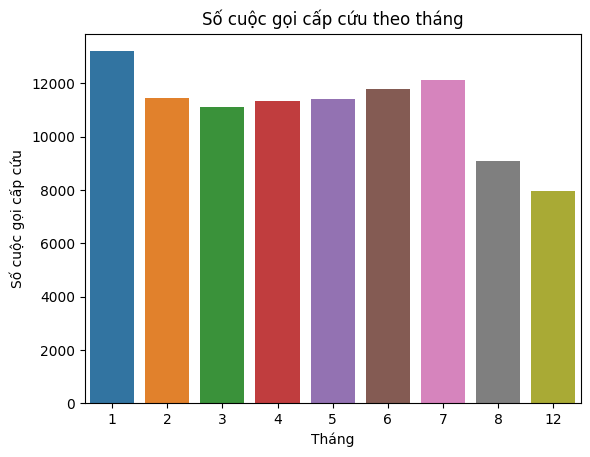

In [85]:
# Phân tích xu hướng theo tháng 
plt.figure()
sns.barplot(x=byMonth.index, y='title', data=byMonth)
plt.xlabel('Tháng')
plt.ylabel('Số cuộc gọi cấp cứu')
plt.title('Số cuộc gọi cấp cứu theo tháng')
plt.show()

In [75]:
# Phân tích xu hướng theo ngày
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=weekdays, ordered=True)
df =df.sort_values('Day of Week')


In [78]:
byDayOfWeek = df.groupby('Day of Week').count()
byDayOfWeek.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month
Day of Week,,,,,,,,,,,,
Mon,14680,14680,14680,12763,14680,14680,14674,14627,14680,14680,14680,14680
Tue,15150,15150,15150,13207,15150,15150,15143,15057,15150,15150,15150,15150
Wed,14879,14879,14879,13030,14879,14879,14868,14794,14879,14879,14879,14879
Thu,14478,14478,14478,12580,14478,14478,14474,14408,14478,14478,14478,14478
Fri,14833,14833,14833,12887,14833,14833,14830,14758,14833,14833,14833,14833


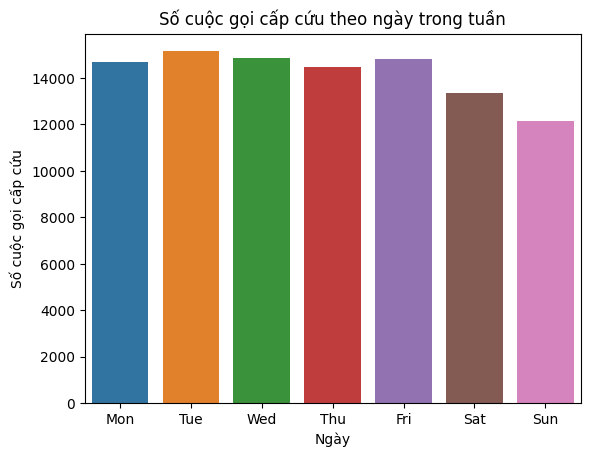

In [87]:
plt.figure()
sns.barplot(x=byDayOfWeek.index, y='title', data=byDayOfWeek)
plt.xlabel('Ngày')
plt.ylabel('Số cuộc gọi cấp cứu')
plt.title('Số cuộc gọi cấp cứu theo ngày trong tuần')
plt.show()








In [96]:
# Phân tích theo loại cuộc gọi
byreason = df.groupby(df['Reason']).count()
byreason.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
Reason,,,,,,,,,,,,
EMS,48877,48877,48877,44327,48877,48877,48853,48877,48877,48877,48877,48877
Fire,14920,14920,14920,13012,14920,14920,14903,14900,14920,14920,14920,14920
Traffic,35695,35695,35695,29298,35695,35695,35693,35196,35695,35695,35695,35695


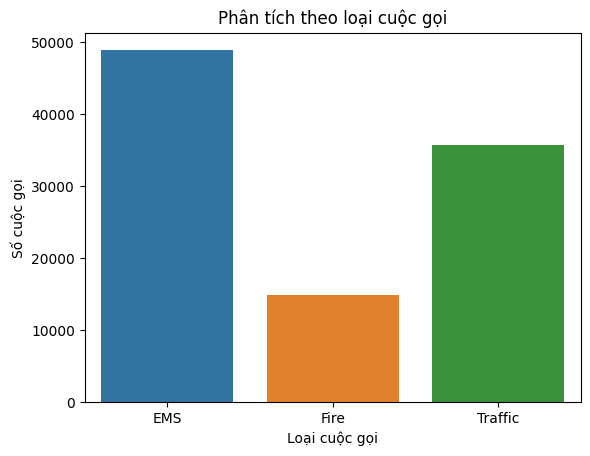

In [99]:
plt.figure()
sns.barplot(x=byreason.index, y='title', data=byreason)
plt.xlabel('Loại cuộc gọi')
plt.ylabel('Số cuộc gọi')
plt.title('Phân tích theo loại cuộc gọi')
plt.show()

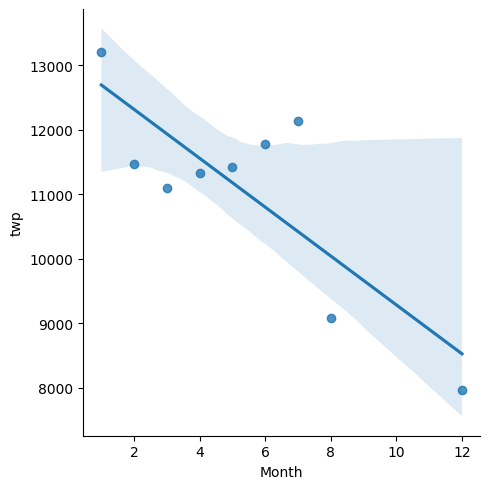

In [104]:
# Create 
sns.lmplot(x = 'Month',y='twp', data = byMonth.reset_index())

In [110]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
79329,40.254768,-75.660459,SHOEMAKER RD & ROBINSON ST; POTTSTOWN; Statio...,19464.0,EMS: SUBJECT IN PAIN,2016-07-04 06:32:00,POTTSTOWN,SHOEMAKER RD & ROBINSON ST,1,EMS,6,7,Mon,2016-07-04
55253,40.108725,-75.192733,RAMP RT309 NB TO RT73 & CHURCH RD; SPRINGFIELD...,NaN,Traffic: DISABLED VEHICLE -,2016-05-02 07:26:00,SPRINGFIELD,RAMP RT309 NB TO RT73 & CHURCH RD,1,Traffic,7,5,Mon,2016-05-02
55252,40.247075,-75.283857,W 5TH ST & MAPLE AVE; LANSDALE; 2016-05-02 @ 0...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-05-02 07:22:00,LANSDALE,W 5TH ST & MAPLE AVE,1,Traffic,7,5,Mon,2016-05-02
55251,40.172314,-75.492728,RT422 & TROUTMAN RD UNDERPASS; UPPER PROVIDEN...,NaN,Traffic: VEHICLE ACCIDENT -,2016-05-02 07:17:01,UPPER PROVIDENCE,RT422 & TROUTMAN RD UNDERPASS,1,Traffic,7,5,Mon,2016-05-02
55250,40.090914,-75.207070,PAPER MILL RD & SKYLINE DR; SPRINGFIELD; 2016-...,19038.0,Traffic: VEHICLE ACCIDENT -,2016-05-02 07:17:01,SPRINGFIELD,PAPER MILL RD & SKYLINE DR,1,Traffic,7,5,Mon,2016-05-02
